# Forage Accenture Data Analytics Task 3 : Data Visualization and Storytelling

## Import packages

In [115]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot stylr
sns.set(color_codes=True)

# Remove warnings
import warnings
warnings.filterwarnings('ignore')


## Loading data with Pandas

In [117]:
df = pd.read_csv('Cleaned Dataset.csv')

In [118]:
df.head()

,Content ID,content_type,Category,reaction_type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-04-09 02:46:20,negative,0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,negative,10
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2020-11-09 02:49:59,negative,10


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   content_type   24573 non-null  object
 2   Category       24573 non-null  object
 3   reaction_type  24573 non-null  object
 4   Datetime       24573 non-null  object
 5   Sentiment      24573 non-null  object
 6   Score          24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [120]:
df.drop('Content ID', axis=1, inplace=True)

In [121]:
df.nunique()

content_type         4
Category            16
reaction_type       16
Datetime         24562
Sentiment            3
Score               15
dtype: int64

In [122]:
# Create Data Info

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,content_type,object,0,0.0,4,"[photo, video, GIF, audio]"
1,Category,object,0,0.0,16,"[studying, healthy eating, technology, food]"
2,reaction_type,object,0,0.0,16,"[disgust, dislike, scared, interested]"
3,Datetime,object,0,0.0,24562,"[2020-11-07 09:43:50, 2021-01-06 19:13:01, 202..."
4,Sentiment,object,0,0.0,3,"[negative, positive, neutral]"
5,Score,int64,0,0.0,15,"[0, 10, 15, 30]"


In [123]:
df.columns

Index(['content_type', 'Category', 'reaction_type', 'Datetime', 'Sentiment',
       'Score'],
      dtype='object')

## Feature Engineering

In [125]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

def categorize_time(datetime):
  hour = datetime.hour
  if 6 <= hour < 12:
    return "Morning"
  elif 12 <= hour < 18:
    return "Afternoon"
  elif 18 <= hour < 21:
    return "Evening"
  elif 21 <= hour <= 23 or 0 <= hour < 6:
    return "Night"
  else:
    raise ValueError("Invalid hour value")

# Add a new column named 'Time_Period'
df['Time_Period'] = df['Datetime'].apply(categorize_time)

## Exploratory Data Analysis

In [127]:
pal = ['#ea698b','#d55d92','#c05299','#ac46a1','#ac46a1','#822faf','#6d23b6','#6411ad','#571089','#47126b']

### Content Type Analysis

In [129]:
df.content_type.value_counts()

content_type
photo    6589
video    6245
GIF      6079
audio    5660
Name: count, dtype: int64

In [130]:
pctg = df.groupby('content_type')['content_type'].count()/len(df)*100
pctg

content_type
GIF      24.738534
audio    23.033411
photo    26.813983
video    25.414072
Name: content_type, dtype: float64

Text(0.5, 1.0, 'Content Type Percentage')

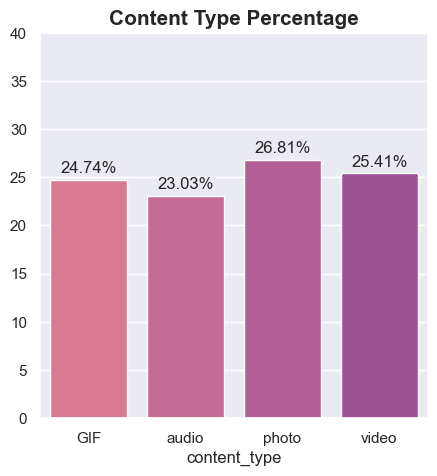

In [131]:
ig,ax=plt.subplots(figsize=(5,5))
sns.barplot(x=pctg.index, y=pctg.values, palette=pal)

plt.bar_label(ax.containers[0], padding=3, fmt='%.2f%%', fontsize=12)
plt.ylim(0,40)
plt.title('Content Type Percentage', fontsize=15, weight='extra bold')

### INSIGHTS:

- The chart shows that video, photo, and GIF content are the most popular, with similar percentages, while audio content is slightly less popular.
- This suggests a preference for visual and animated content over audio-only content.

## Date Time Analysis

#### In which month the maximum number of posts were put

In [135]:
import calendar

# Convert the 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract the month and year from the 'Datetime' column
df['Month'] = df['Datetime'].dt.to_period('M')  # This will give you a Year-Month format

# Count the number of posts for each month
monthly_post_counts = df['Month'].value_counts().reset_index()
monthly_post_counts.columns = ['Month', 'Post_Count']

# Sort the results to find the month with the most posts
most_posts_month = monthly_post_counts.sort_values(by='Post_Count', ascending=False).head(1)

# Convert month labels to alphabetical names
month_names = [calendar.month_name[month.month] for month in monthly_post_counts['Month']]


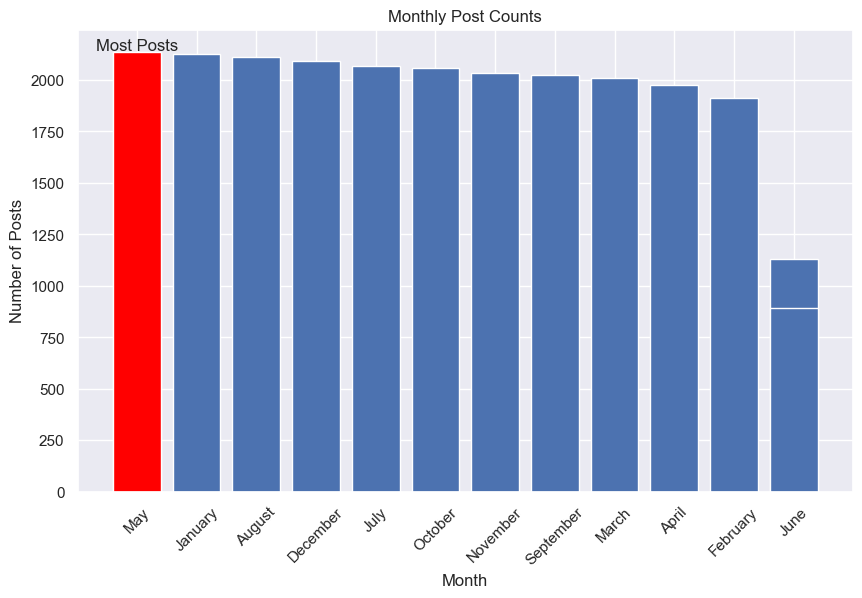

In [136]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(month_names, monthly_post_counts['Post_Count'])

# Customize the chart
plt.title('Monthly Post Counts')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)

# Highlight the month with the most posts
most_posts_month_index = monthly_post_counts.index[monthly_post_counts['Post_Count'] == monthly_post_counts['Post_Count'].max()][0]
plt.bar(month_names[most_posts_month_index], monthly_post_counts['Post_Count'][most_posts_month_index], color='red')
plt.text(month_names[most_posts_month_index], monthly_post_counts['Post_Count'][most_posts_month_index] + 5, 'Most Posts', ha='center')


plt.show()

### INSIGHTS:

- The chart shows that May was the month with the highest number of posts, followed by January and August. 
- This suggests that posting activity is highest in these months, potentially due to seasonal factors or other events.

## Sentiment Analysis

In [139]:
df.Sentiment.value_counts()

Sentiment
positive    13807
negative     7695
neutral      3071
Name: count, dtype: int64

In [140]:
pctg = df.groupby('Sentiment')['Sentiment'].count()/len(df)*100
pctg

Sentiment
negative    31.314858
neutral     12.497457
positive    56.187686
Name: Sentiment, dtype: float64

([<matplotlib.patches.Wedge at 0x25374102810>,
 [Text(0.6092623670493492, 0.915859906370742, 'negative'),
  Text(-0.7809188477576229, 0.7747036550945829, 'neutral'),
  Text(-0.23180368723616043, -1.1773984247414808, 'positive')],
 [Text(0.33232492748146314, 0.49955994892949557, '31.3%'),
  Text(-0.42595573514052154, 0.4225656300515907, '12.5%'),
  Text(-0.1352188175544269, -0.6868157477658637, '56.2%')])

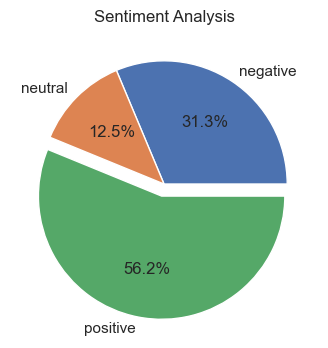

In [141]:
plt.figure(figsize=(5, 4))
plt.title("Sentiment Analysis")
plt.pie(pctg.values, labels = pctg.index, explode = (0, 0, 0.1), autopct='%1.1f%%', shadow=False)

### Which content type has the most reviews

In [143]:
my_crosstab=pd.crosstab(df['Sentiment'], df['content_type'])
my_crosstab

content_type,GIF,audio,photo,video
Sentiment,,,,
negative,1924,1771,2057,1943
neutral,774,673,832,792
positive,3381,3216,3700,3510


In [144]:
# Create a crosstab table
my_crosstab = pd.crosstab(df['content_type'], df['Sentiment'])

# Sum the occurrences of each content type across all sentiments
total_sentiment = my_crosstab.sum(axis=1)

# Find the content type with the most sentiment analysis
content_type_with_most_sentiment = total_sentiment.idxmax()


print("Content Type with the most sentiment analysis:", content_type_with_most_sentiment)

Content Type with the most sentiment analysis: photo


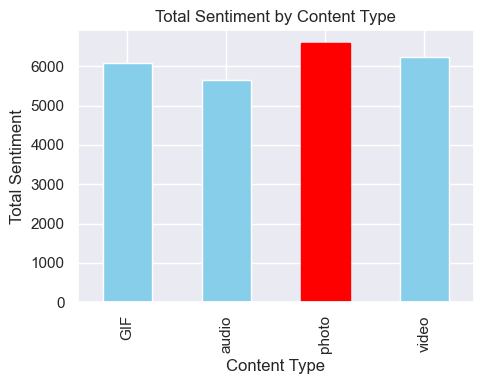

In [145]:
# Visualize the total sentiment for each content type using a bar chart
bar_container = total_sentiment.plot(kind='bar', color='skyblue', figsize=(5,4))  # Set initial color for all bars

# Highlight the bar for the content type "photo" 
bar_container.patches[total_sentiment.index.get_loc("photo")].set_color('red')

plt.title('Total Sentiment by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Total Sentiment')
#plt.legend(title='Sentiment Distribution', labels=total_sentiment.index.tolist())
plt.tight_layout()
plt.show()

In [146]:
# Group by 'Time_Period' and count the occurrences of each sentiment
grouped_data = df.groupby('Time_Period')['Sentiment'].value_counts().unstack()

# Fill missing values with 0 (for time periods with no reviews of a certain sentiment)
grouped_data.fillna(0, inplace=True)

# Print the grouped data
print(grouped_data)

Sentiment    negative  neutral  positive
Time_Period                             
Afternoon        1861      748      3418
Evening           935      381      1731
Morning          1986      792      3515
Night            2913     1150      5143


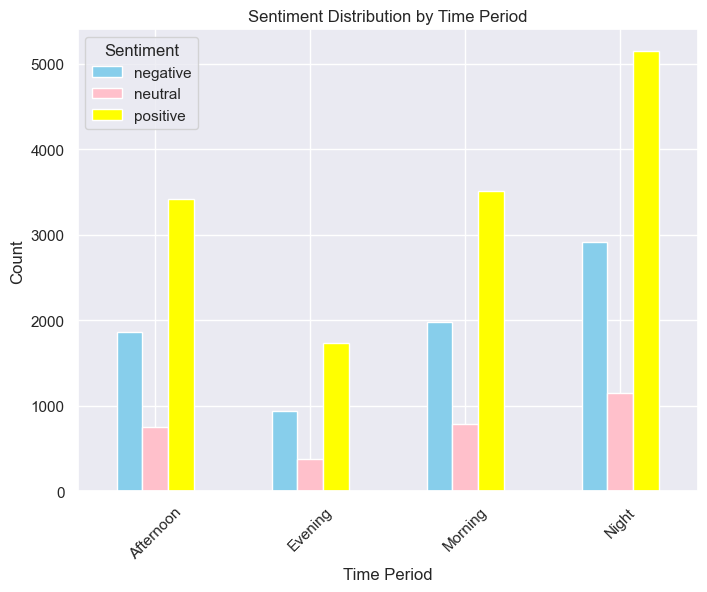

In [147]:
# Create a bar chart
colors = ['skyblue', 'pink', 'yellow'] 

grouped_data.plot(kind='bar', color=colors)

plt.title('Sentiment Distribution by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.show()

### INSIGHT:

- Positive sentiment is highest in the evening and night, while negative sentiment is highest in the afternoon.

## Reaction Type Analysis

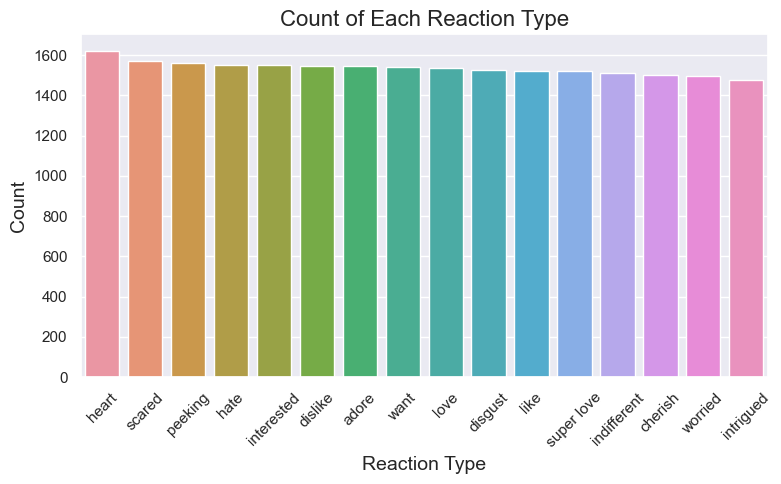

In [150]:
plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='reaction_type', order=df['reaction_type'].value_counts().index)
plt.title('Count of Each Reaction Type', fontsize=16)
plt.xlabel('Reaction Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45) 
plt.tight_layout()  

plt.show()

### Reaction Type by its Sentiment Score

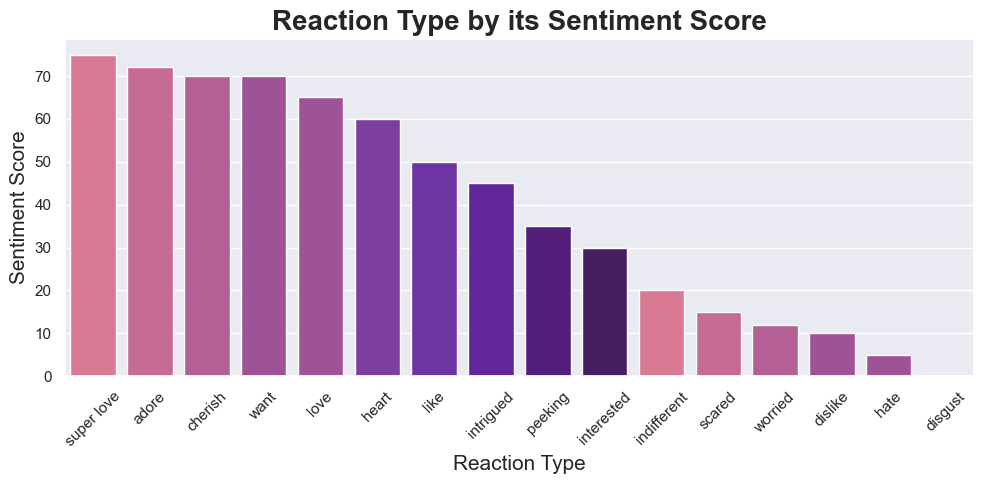

In [153]:
react_type_score = df.groupby('reaction_type')['Score'].mean().reset_index()
plt.figure(figsize=(10,5))

sns.barplot(x='reaction_type', y='Score', data=react_type_score, 
            palette=pal, order=react_type_score.sort_values(by='Score', ascending=False)['reaction_type'])

plt.title('Reaction Type by its Sentiment Score', fontsize=20, weight='extra bold')
plt.xlabel('Reaction Type', fontsize=15)
plt.ylabel('Sentiment Score', fontsize=15)
plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show()

#### INSIGHT:

- "Super love" and "adore" have the highest sentiment scores.

# Category Analysis

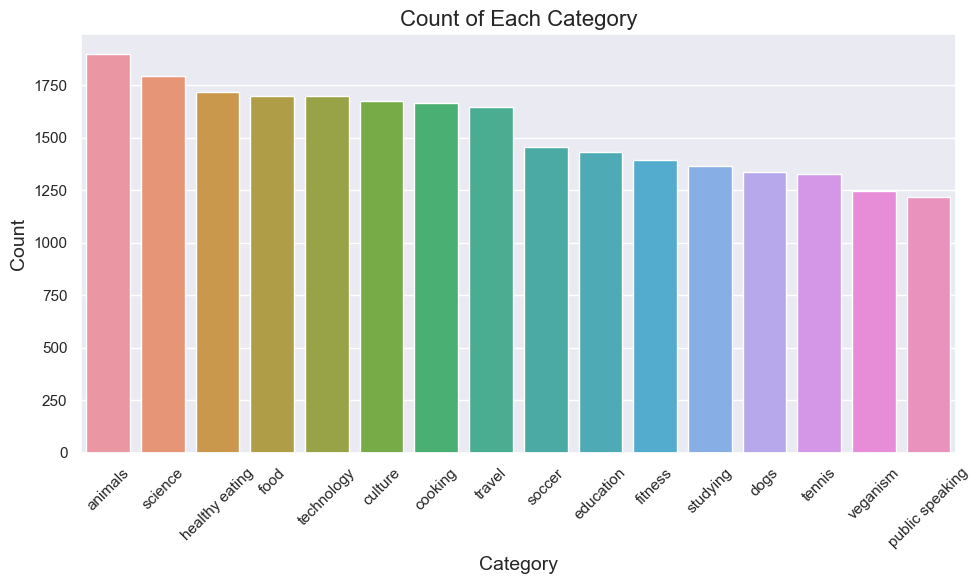

In [155]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)

plt.title('Count of Each Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()

### Top 5 Content Categories by Aggregate Popularity

In [158]:
# Group by 'Category' and sum the 'Score' to get aggregate popularity
category_popularity = df.groupby('Category')['Score'].sum().reset_index()

# Rename the columns for clarity
category_popularity.columns = ['Category', 'Total_Popularity']

# Sort the categories by Total_Popularity in descending order
top_categories = category_popularity.sort_values(by='Total_Popularity', ascending=False).head(5)

# Display the top 5 categories
print(top_categories)

          Category  Total_Popularity
0          animals             74965
9          science             71168
7   healthy eating             69339
12      technology             68738
6             food             66676


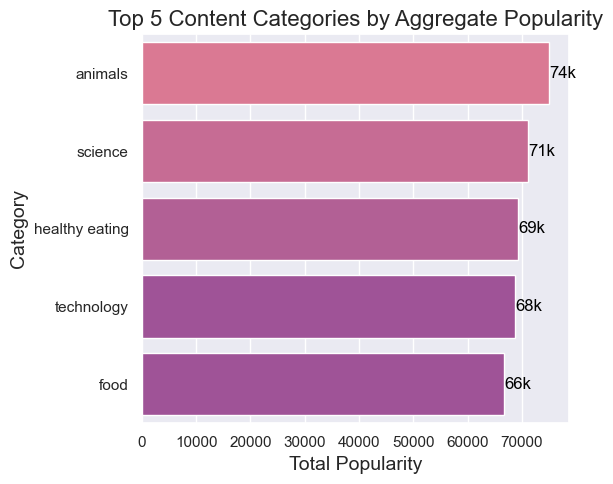

In [160]:
# Create a bar plot for the top categories
plt.figure(figsize=(6, 5))
bar_plot = sns.barplot(x='Total_Popularity', y='Category', data=top_categories, palette=pal)

# Add titles and labels
plt.title('Top 5 Content Categories by Aggregate Popularity', fontsize=16)
plt.xlabel('Total Popularity', fontsize=14)
plt.ylabel('Category', fontsize=14)

# Add numbers at the end of each bar in 'k' format
for p in bar_plot.patches:
    popularity_value = int(p.get_width())
    formatted_value = f'{popularity_value // 1000}k'  # Format as 'k'
    bar_plot.annotate(formatted_value, 
                      (p.get_width(), p.get_y() + p.get_height() / 2), 
                      ha='left', va='center', 
                      fontsize=12, color='black')

plt.tight_layout()  
plt.show()

### INSIGHTS:

- Animal related content tends to generate high levels of engagement, such as posts,likes, shares, comments, and views
- Educational Interest: Users are interested in learning new things and expanding their knowledge. Science-related content can cover a wide range of topics, from biology to physics.
- While healthy eating content can provide information on nutrition, recipes, and wellness.There's a growing interest in health and well-being.

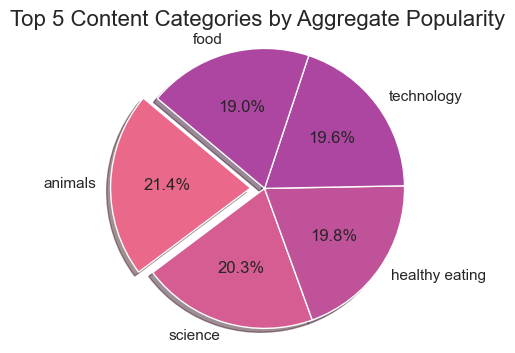

In [163]:
# Set the figure size
plt.figure(figsize=(4,4))

# Create a pie chart
plt.pie(top_categories['Total_Popularity'], 
        labels=top_categories['Category'], 
        autopct='%1.1f%%',  
        startangle=140, 
        shadow=True,
        explode=(0.1,0,0,0,0),
        colors=pal) 

plt.title('Top 5 Content Categories by Aggregate Popularity', fontsize=16)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Category by Positive Sentiment

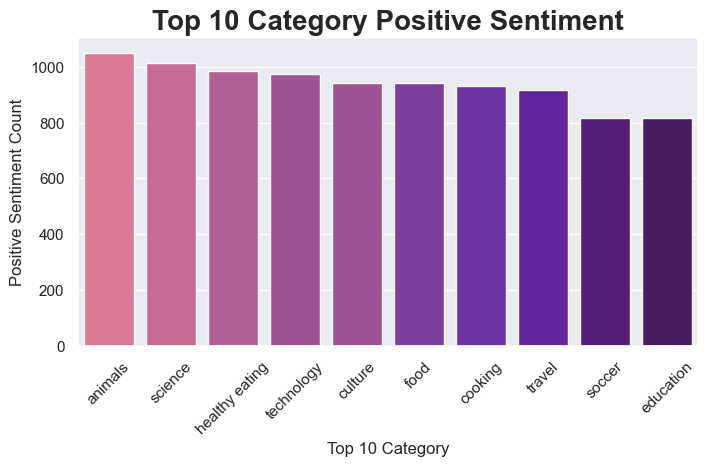

In [166]:
# Filter for positive sentiment
pos = df[df['Sentiment'] == 'positive']
pos_counts = pos.groupby('Category')['Time_Period'].count().reset_index()

# Sort the categories by 'Hours' in descending order and get the top 10
top_10_pos = pos_counts.sort_values(by='Time_Period', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Category', y='Time_Period', data=top_10_pos, palette=pal)
plt.ylabel('Positive Sentiment Count', fontsize=12)
plt.xlabel('Top 10 Category', fontsize=12)
plt.title('Top 10 Category Positive Sentiment', fontsize=20, weight='extra bold')

plt.xticks(rotation=45)

plt.show()

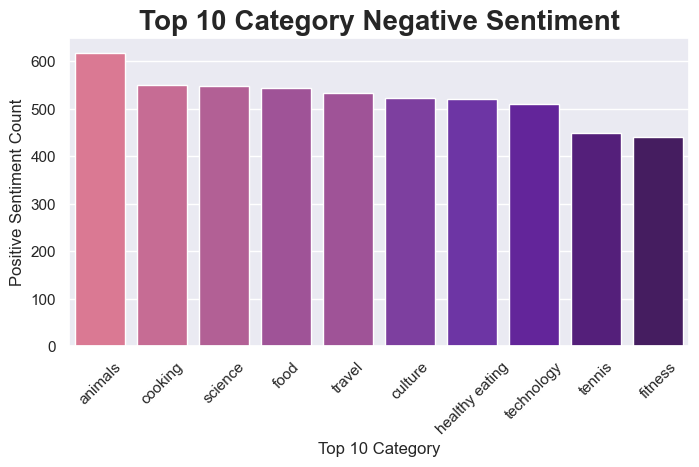

In [168]:
# Filter for negatice sentiment
pos = df[df['Sentiment'] == 'negative']
pos_counts = pos.groupby('Category')['Time_Period'].count().reset_index()

# Sort the categories by 'Hours' in descending order and get the top 10
top_10_pos = pos_counts.sort_values(by='Time_Period', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Category', y='Time_Period', data=top_10_pos, palette=pal)
plt.ylabel('Positive Sentiment Count', fontsize=12)
plt.xlabel('Top 10 Category', fontsize=12)
plt.title('Top 10 Category Negative Sentiment', fontsize=20, weight='extra bold')

plt.xticks(rotation=45)

plt.show()

### INSIGHT:

- People talk a lot about animals, both positively and negatively. This means that animals are a popular topic of discussion, but it also suggests that there are different viewpoints and arguments about them.